# Data Exploration

## Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
df20 = pd.read_csv('input/2020-08-20_sds011_sensor_6842.csv', sep=';')
df21 = pd.read_csv('input/2020-08-21_sds011_sensor_6842.csv', sep=';')
df22 = pd.read_csv('input/2020-08-22_sds011_sensor_6842.csv', sep=';')
df23 = pd.read_csv('input/2020-08-23_sds011_sensor_6842.csv', sep=';')
df24 = pd.read_csv('input/2020-08-24_sds011_sensor_6842.csv', sep=';')

In [3]:
df20

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-20T00:01:37,4.47,NaN,NaN,1.50,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-20T00:04:09,3.87,NaN,NaN,1.23,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-20T00:06:41,2.20,NaN,NaN,1.23,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-20T00:09:12,2.83,NaN,NaN,1.30,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-20T00:11:44,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
562,6842,SDS011,3460,52.028,8.916,2020-08-20T23:47:15,1.50,NaN,NaN,1.00,NaN,NaN
563,6842,SDS011,3460,52.028,8.916,2020-08-20T23:49:47,1.83,NaN,NaN,1.00,NaN,NaN
564,6842,SDS011,3460,52.028,8.916,2020-08-20T23:52:23,2.20,NaN,NaN,1.37,NaN,NaN
565,6842,SDS011,3460,52.028,8.916,2020-08-20T23:54:54,2.77,NaN,NaN,1.27,NaN,NaN


In [4]:
df20['timestamp'] = pd.to_datetime(df20['timestamp'])
df21['timestamp'] = pd.to_datetime(df21['timestamp'])
df22['timestamp'] = pd.to_datetime(df22['timestamp'])
df23['timestamp'] = pd.to_datetime(df23['timestamp'])
df24['timestamp'] = pd.to_datetime(df24['timestamp'])

In [5]:
df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df20 = df20.set_index('timestamp')
df = df.set_index('timestamp')
#df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df = df20.copy()

In [6]:
df

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-20 00:01:37,6842,SDS011,3460,52.028,8.916,4.47,NaN,NaN,1.50,NaN,NaN
2020-08-20 00:04:09,6842,SDS011,3460,52.028,8.916,3.87,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:06:41,6842,SDS011,3460,52.028,8.916,2.20,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:09:12,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.30,NaN,NaN
2020-08-20 00:11:44,6842,SDS011,3460,52.028,8.916,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24 23:49:53,6842,SDS011,3460,52.028,8.916,12.30,NaN,NaN,9.23,NaN,NaN
2020-08-24 23:52:24,6842,SDS011,3460,52.028,8.916,12.53,NaN,NaN,10.10,NaN,NaN
2020-08-24 23:54:56,6842,SDS011,3460,52.028,8.916,12.87,NaN,NaN,10.40,NaN,NaN


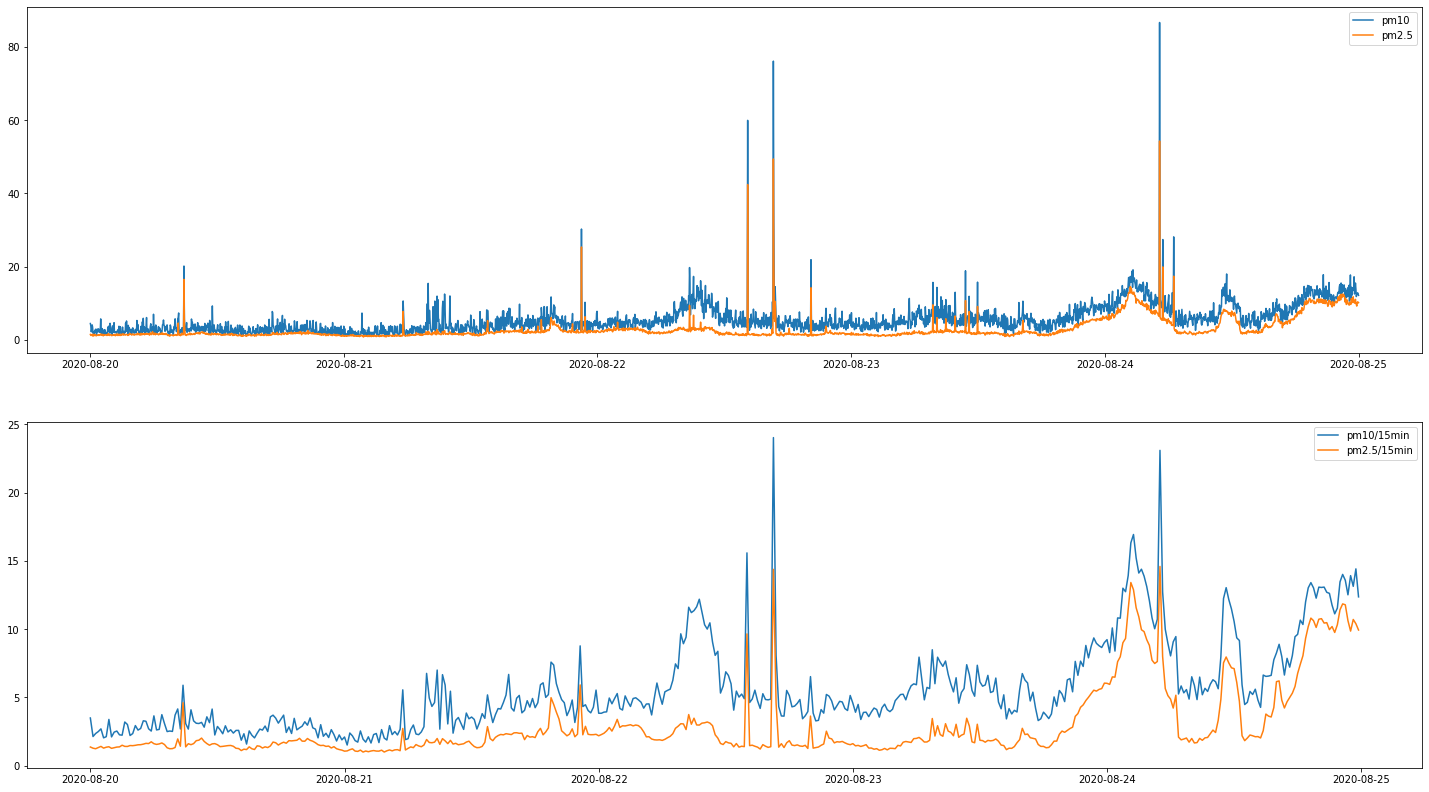

In [7]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(df['P1'], '-', label = 'pm10')
plt.plot(df['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 15
df = df.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(df['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(df['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

# Getting Data

In [8]:
date = datetime.datetime.strptime('2020-08-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11
2020-08-12
2020-08-13
2020-08-14
2020-08-15
2020-08-16
2020-08-17
2020-08-18
2020-08-19
2020-08-20
2020-08-21
2020-08-22
2020-08-23
2020-08-24
2020-08-25
2020-08-26
2020-08-27
2020-08-28
2020-08-29
2020-08-30
2020-08-31
2020-09-01
2020-09-02


In [9]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [10]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-01T00:01:36,3.93,NaN,NaN,2.00,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-01T00:04:07,4.67,NaN,NaN,2.10,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-01T00:06:39,2.83,NaN,NaN,1.80,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-01T00:09:14,7.00,NaN,NaN,1.90,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-01T00:11:49,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
580,6842,SDS011,3460,52.028,8.916,2020-09-02T23:50:12,2.93,NaN,NaN,1.47,NaN,NaN
581,6842,SDS011,3460,52.028,8.916,2020-09-02T23:52:40,4.10,NaN,NaN,1.47,NaN,NaN
582,6842,SDS011,3460,52.028,8.916,2020-09-02T23:55:06,1.63,NaN,NaN,1.37,NaN,NaN
583,6842,SDS011,3460,52.028,8.916,2020-09-02T23:57:32,2.60,NaN,NaN,1.20,NaN,NaN


In [11]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,18221.0,18221.0,1.822100e+04,1.822100e+04,18221.000000,0.0,0.0,18221.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.019134,NaN,NaN,4.703140,NaN,NaN
std,0.0,0.0,1.421124e-14,1.776406e-15,6.354786,NaN,NaN,5.321402,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.400000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,3.430000,NaN,NaN,1.500000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,5.570000,NaN,NaN,2.600000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,8.750000,NaN,NaN,6.430000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,226.620000,NaN,NaN,177.980000,NaN,NaN


In [12]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [13]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-01 00:01:36,6842,SDS011,3460,52.028,8.916,3.93,NaN,NaN,2.00,NaN,NaN
2020-08-01 00:04:07,6842,SDS011,3460,52.028,8.916,4.67,NaN,NaN,2.10,NaN,NaN
2020-08-01 00:06:39,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.80,NaN,NaN
2020-08-01 00:09:14,6842,SDS011,3460,52.028,8.916,7.00,NaN,NaN,1.90,NaN,NaN
2020-08-01 00:11:49,6842,SDS011,3460,52.028,8.916,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 23:50:12,6842,SDS011,3460,52.028,8.916,2.93,NaN,NaN,1.47,NaN,NaN
2020-09-02 23:52:40,6842,SDS011,3460,52.028,8.916,4.10,NaN,NaN,1.47,NaN,NaN
2020-09-02 23:55:06,6842,SDS011,3460,52.028,8.916,1.63,NaN,NaN,1.37,NaN,NaN


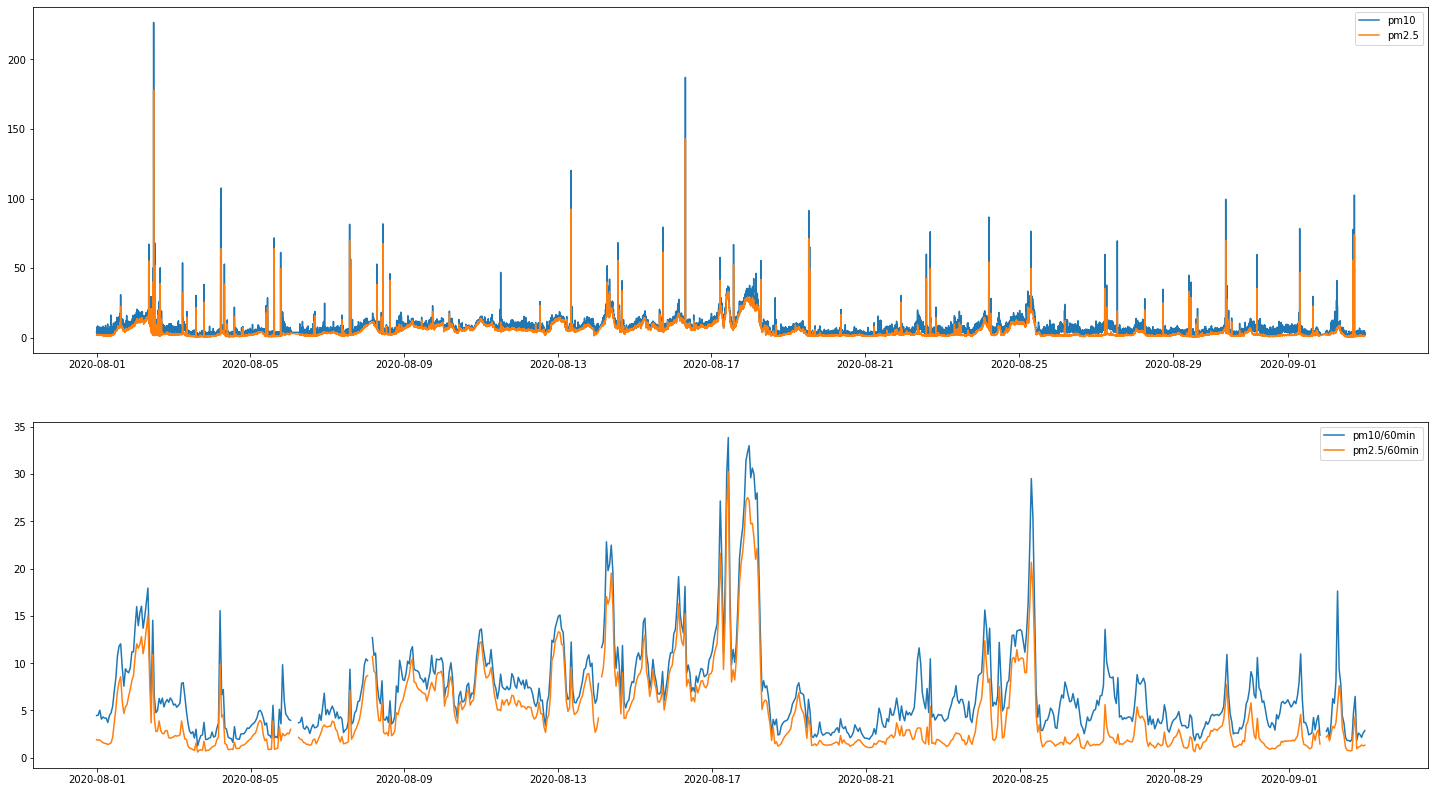

In [14]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

In [15]:
comp2[comp2.index >'2020-08-26']

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,
2020-08-26 01:00:00,6842.0,3460.0,52.028,8.916,5.848696,NaN,NaN,1.580000,NaN,NaN
2020-08-26 02:00:00,6842.0,3460.0,52.028,8.916,6.637083,NaN,NaN,1.629167,NaN,NaN
2020-08-26 03:00:00,6842.0,3460.0,52.028,8.916,6.297917,NaN,NaN,1.357917,NaN,NaN
2020-08-26 04:00:00,6842.0,3460.0,52.028,8.916,8.000455,NaN,NaN,2.193636,NaN,NaN
2020-08-26 05:00:00,6842.0,3460.0,52.028,8.916,7.384762,NaN,NaN,1.619524,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-02 19:00:00,6842.0,3460.0,52.028,8.916,2.601304,NaN,NaN,1.118696,NaN,NaN
2020-09-02 20:00:00,6842.0,3460.0,52.028,8.916,2.447600,NaN,NaN,1.185600,NaN,NaN
2020-09-02 21:00:00,6842.0,3460.0,52.028,8.916,2.142917,NaN,NaN,1.338750,NaN,NaN


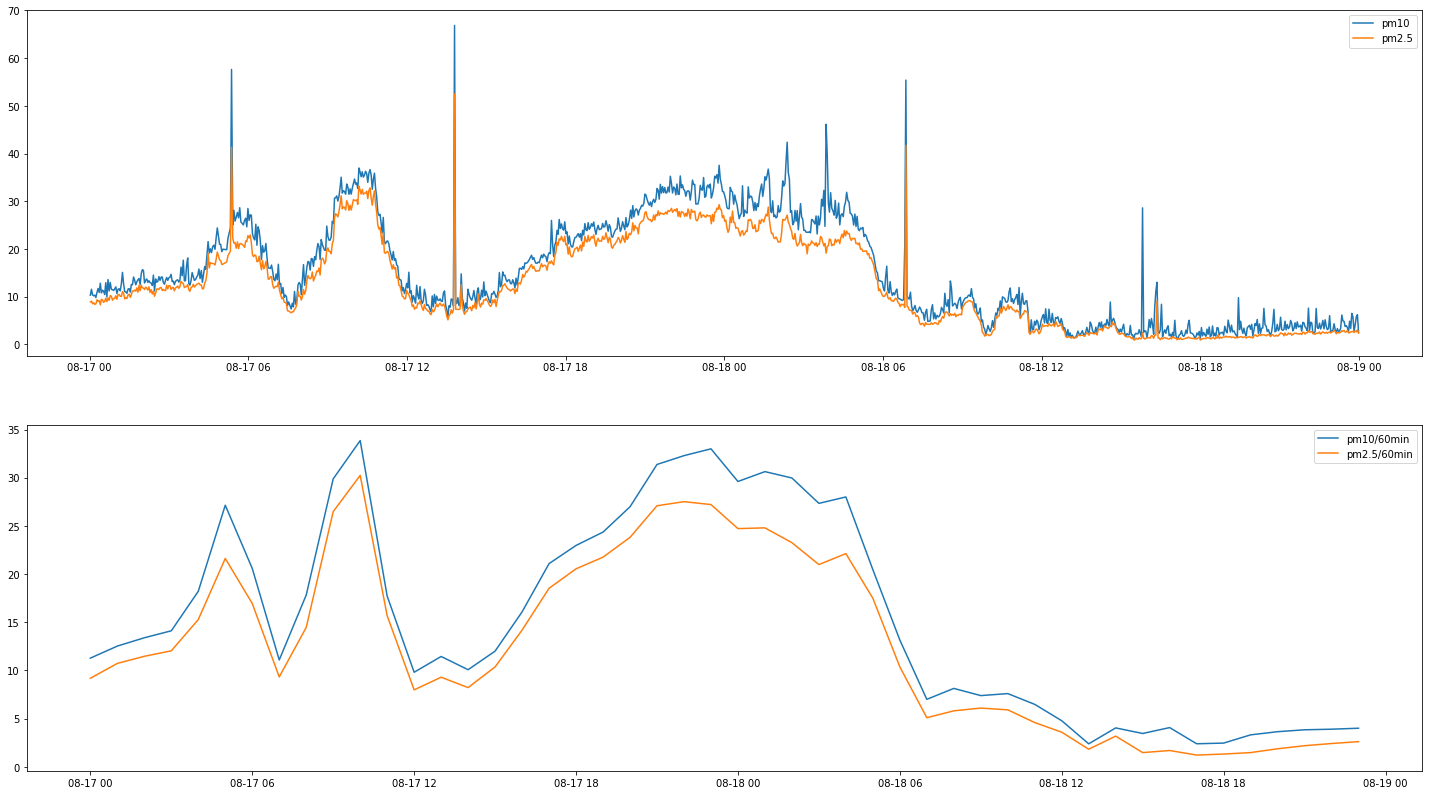

In [16]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp.loc['2020-08-17':'2020-08-18']['P1'], '-', label = 'pm10')
plt.plot(comp.loc['2020-08-17':'2020-08-18']['P2'], '-', label = 'pm2.5')
plt.legend()

plt.subplot(212)
plt.plot(comp2.loc['2020-08-17':'2020-08-18']['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2.loc['2020-08-17':'2020-08-18']['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

In [17]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]

In [18]:
SensorList

['29366',
 '10410',
 '19004',
 '30685',
 '22543',
 '3859',
 '22725',
 '1691',
 '25343',
 '48689',
 '539',
 '1180',
 '5221',
 '10029',
 '26277',
 '16954',
 '8474',
 '1226',
 '2187',
 '3054',
 '11608',
 '33026',
 '43366',
 '3597',
 '11222',
 '11224',
 '9547',
 '564',
 '31035',
 '4857']

In [19]:
SensorData = {}
for sensor in SensorList:
    print(sensor)
    date = datetime.datetime.strptime('2020-08-31', '%Y-%m-%d').date()
    test = []
    comp = []
    while date < datetime.datetime.now().date():
        d = date.strftime('%Y-%m-%d')
        print(d)
        try:
            test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
        except:
            print("\tdoes not exist jet")
        date += datetime.timedelta(days = 1)
    try:
        comp = test[0]
        for i in range(1, len(test)):
            comp = pd.concat([comp, test[i]], axis = 0)
        comp['timestamp'] = pd.to_datetime(comp['timestamp'])
        comp = comp.set_index('timestamp')
    except:
        print("\tno data")
    SensorData[sensor] = comp

29366
2020-08-31
2020-09-01
2020-09-02
10410
2020-08-31
2020-09-01
2020-09-02
19004
2020-08-31
2020-09-01
2020-09-02
30685
2020-08-31
2020-09-01
2020-09-02
22543
2020-08-31
2020-09-01
2020-09-02
3859
2020-08-31
2020-09-01
2020-09-02
22725
2020-08-31
2020-09-01
2020-09-02
1691
2020-08-31
2020-09-01
2020-09-02
25343
2020-08-31
2020-09-01
2020-09-02
48689
2020-08-31
2020-09-01
2020-09-02
539
2020-08-31
2020-09-01
2020-09-02
1180
2020-08-31
2020-09-01
2020-09-02
5221
2020-08-31
2020-09-01
2020-09-02
10029
2020-08-31
2020-09-01
2020-09-02
26277
2020-08-31
2020-09-01
2020-09-02
16954
2020-08-31
2020-09-01
2020-09-02
8474
2020-08-31
2020-09-01
2020-09-02
1226
2020-08-31
2020-09-01
2020-09-02
2187
2020-08-31
2020-09-01
2020-09-02
3054
2020-08-31
2020-09-01
2020-09-02
11608
2020-08-31
2020-09-01
2020-09-02
33026
2020-08-31
2020-09-01
2020-09-02
43366
2020-08-31
	does not exist jet
2020-09-01
	does not exist jet
2020-09-02
	does not exist jet
	no data
3597
2020-08-31
2020-09-01
2020-09-02
11222


In [20]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-31 00:02:54,4857,SDS011,2443,51.978,8.472,8.00,NaN,NaN,4.35,NaN,NaN
2020-08-31 00:08:03,4857,SDS011,2443,51.978,8.472,7.93,NaN,NaN,3.95,NaN,NaN
2020-08-31 00:13:11,4857,SDS011,2443,51.978,8.472,7.05,NaN,NaN,3.17,NaN,NaN
2020-08-31 00:23:26,4857,SDS011,2443,51.978,8.472,11.70,NaN,NaN,3.12,NaN,NaN
2020-08-31 00:28:33,4857,SDS011,2443,51.978,8.472,8.85,NaN,NaN,2.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 23:36:26,4857,SDS011,2443,51.978,8.472,3.87,NaN,NaN,2.20,NaN,NaN
2020-09-02 23:41:23,4857,SDS011,2443,51.978,8.472,5.07,NaN,NaN,2.10,NaN,NaN
2020-09-02 23:46:19,4857,SDS011,2443,51.978,8.472,4.12,NaN,NaN,1.62,NaN,NaN


# Different API Call

In [23]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
df = pd.DataFrame(rdata)

In [33]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
0,1736998638,NaN,2020-09-03 20:51:01,"{'id': 10132, 'latitude': '50.864', 'longitude...","{'id': 19940, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746630984, 'value': '5.57', 'value_ty..."
1,1736998637,NaN,2020-09-03 20:51:01,"{'id': 33272, 'latitude': '51.922', 'longitude...","{'id': 47530, 'pin': '11', 'sensor_type': {'id...","[{'id': 3746630981, 'value': '18.52', 'value_t..."
2,1736998636,NaN,2020-09-03 20:51:01,"{'id': 27775, 'latitude': '48.384', 'longitude...","{'id': 39463, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3746630979, 'value': '24.30', 'value_t..."
3,1736998635,NaN,2020-09-03 20:51:01,"{'id': 9459, 'latitude': '50.254', 'longitude'...","{'id': 18659, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746630977, 'value': '7.00', 'value_ty..."
4,1736998634,NaN,2020-09-03 20:51:01,"{'id': 31602, 'latitude': '53.57287334458', 'l...","{'id': 45892, 'pin': '11', 'sensor_type': {'id...","[{'id': 3746630974, 'value': '18.42', 'value_t..."
...,...,...,...,...,...,...
46321,1736952080,NaN,2020-09-03 20:45:52,"{'id': 2984, 'latitude': '42.656', 'longitude'...","{'id': 5917, 'pin': '11', 'sensor_type': {'id'...","[{'id': 3746530227, 'value': '20.28', 'value_t..."
46322,1736952079,NaN,2020-09-03 20:45:52,"{'id': 20624, 'latitude': '55.87', 'longitude'...","{'id': 34360, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3746530225, 'value': '13.10', 'value_t..."
46323,1736952078,NaN,2020-09-03 20:45:52,"{'id': 27746, 'latitude': '52.228', 'longitude...","{'id': 42084, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746530223, 'value': '5.55', 'value_ty..."
46324,1736952077,NaN,2020-09-03 20:45:52,"{'id': 30492, 'latitude': '52.088', 'longitude...","{'id': 44772, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746530221, 'value': '31.10', 'value_t..."


In [32]:
df.location[0]

{'id': 10132,
 'latitude': '50.864',
 'longitude': '5.176',
 'altitude': '33.6',
 'country': 'BE',
 'exact_location': 0,
 'indoor': 0}

In [34]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [38]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues
1,1736998637,NaN,2020-09-03 20:51:01,"{'id': 33272, 'latitude': '51.922', 'longitude...","{'id': 47530, 'pin': '11', 'sensor_type': {'id...","[{'id': 3746630981, 'value': '18.52', 'value_t..."
4,1736998634,NaN,2020-09-03 20:51:01,"{'id': 31602, 'latitude': '53.57287334458', 'l...","{'id': 45892, 'pin': '11', 'sensor_type': {'id...","[{'id': 3746630974, 'value': '18.42', 'value_t..."
5,1736998633,NaN,2020-09-03 20:51:01,"{'id': 18777, 'latitude': '50.992', 'longitude...","{'id': 32288, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746630972, 'value': '3.40', 'value_ty..."
8,1736998630,NaN,2020-09-03 20:51:01,"{'id': 10199, 'latitude': '48.85', 'longitude'...","{'id': 20078, 'pin': '1', 'sensor_type': {'id'...","[{'id': 3746630965, 'value': '3.77', 'value_ty..."
9,1736998629,NaN,2020-09-03 20:51:01,"{'id': 6858, 'latitude': '49.39', 'longitude':...","{'id': 13575, 'pin': '3', 'sensor_type': {'id'...","[{'id': 3746630963, 'value': '99319.00', 'valu..."
...,...,...,...,...,...,...
46306,1736952095,NaN,2020-09-03 20:45:52,"{'id': 7257, 'latitude': '52.158', 'longitude'...","{'id': 14347, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3746530260, 'value': '16.20', 'value_t..."
46309,1736952092,NaN,2020-09-03 20:45:52,"{'id': 11002, 'latitude': '48.256', 'longitude...","{'id': 21682, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3746530252, 'value': '15.20', 'value_t..."
46312,1736952089,NaN,2020-09-03 20:45:52,"{'id': 2865, 'latitude': '53.114', 'longitude'...","{'id': 5684, 'pin': '1', 'sensor_type': {'id':...","[{'id': 3746530247, 'value': '35.87', 'value_t..."
46314,1736952087,NaN,2020-09-03 20:45:52,"{'id': 21608, 'latitude': '49.3', 'longitude':...","{'id': 35495, 'pin': '7', 'sensor_type': {'id'...","[{'id': 3746530242, 'value': '23.40', 'value_t..."


In [40]:
df.location[1]

{'id': 33272,
 'latitude': '51.922',
 'longitude': '7.73',
 'altitude': '53.9',
 'country': 'DE',
 'exact_location': 0,
 'indoor': 0}